In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/sample_data/gene_expression.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


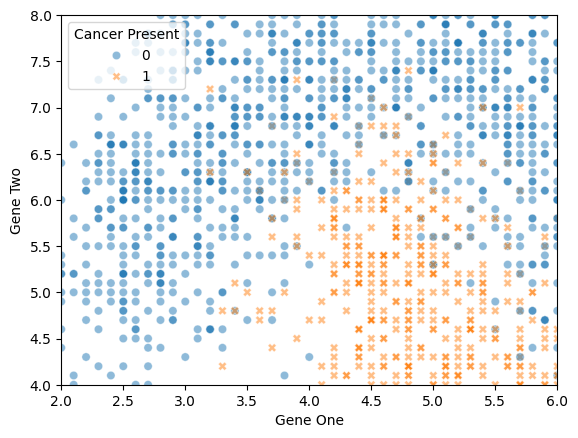

In [13]:
sns.scatterplot(data=df,
                x='Gene One',
                y = 'Gene Two',
                hue = 'Cancer Present',
                alpha = 0.5,
                style='Cancer Present')

plt.xlim(2,6)
plt.ylim(4,8)
plt.show()

In [9]:
len(df)

3000

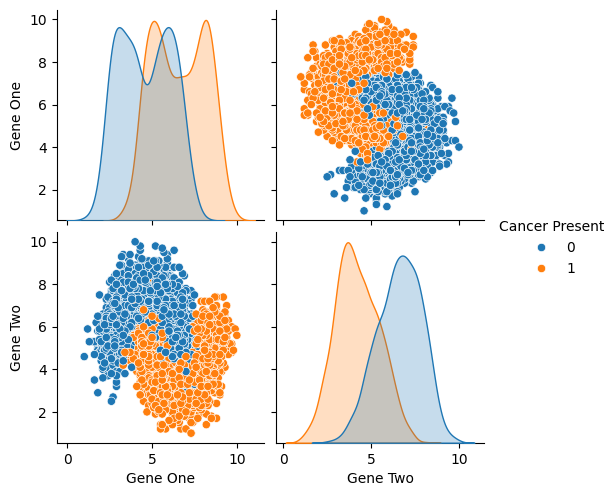

In [14]:
sns.pairplot(data=df, hue='Cancer Present')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cancer Present', axis=1),
                                                    df['Cancer Present'],
                                                    test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
model = KNeighborsClassifier(n_neighbors=1)

In [20]:
model.fit(X_train_t, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
y_pred = model.predict(X_test_t)

In [22]:
confusion_matrix(y_test, y_pred)

array([[295,  33],
       [ 27, 245]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       328
           1       0.88      0.90      0.89       272

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



In [24]:
df['Cancer Present'].value_counts()

,count
Cancer Present,
1,1500
0,1500


In [25]:
from sklearn.metrics import accuracy_score

In [27]:
test_error_rate = []

for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_t, y_train)
  pred_i = knn.predict(X_test_t)

  test_error = 1-accuracy_score(y_test, pred_i)
  test_error_rate.append(test_error)

In [28]:
test_error_rate

[0.09999999999999998,
 0.09833333333333338,
 0.07166666666666666,
 0.08333333333333337,
 0.07999999999999996,
 0.07666666666666666,
 0.07166666666666666,
 0.07499999999999996,
 0.06333333333333335,
 0.06666666666666665,
 0.07166666666666666,
 0.06833333333333336,
 0.06333333333333335,
 0.06333333333333335,
 0.06333333333333335,
 0.06166666666666665,
 0.06333333333333335,
 0.06666666666666665,
 0.06000000000000005,
 0.06333333333333335,
 0.06000000000000005,
 0.05500000000000005,
 0.06000000000000005,
 0.05833333333333335,
 0.06000000000000005,
 0.05666666666666664,
 0.06000000000000005,
 0.06166666666666665,
 0.06499999999999995]

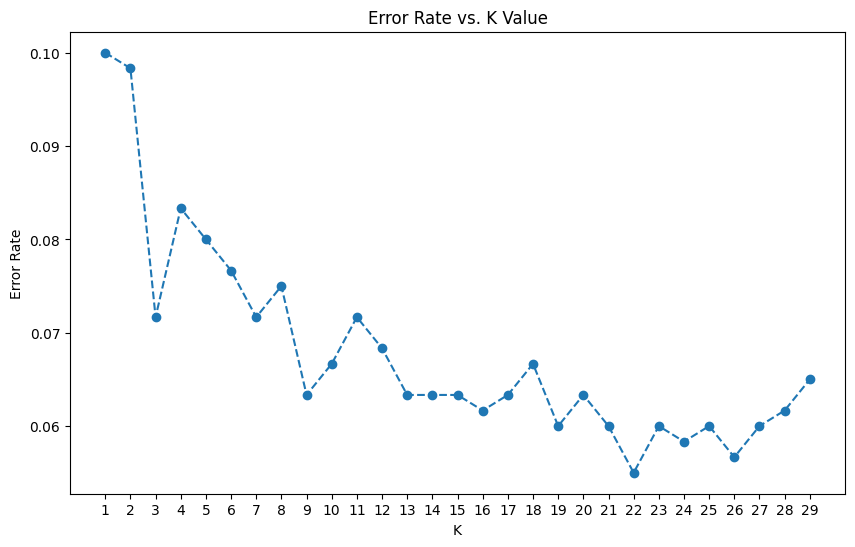

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), test_error_rate, marker='o', linestyle='dashed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1,30))
plt.show()

# create pipeline

In [31]:
scaler = StandardScaler()

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [35]:
operations = [('scaler',scaler),('knn',knn)]

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(operations)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
k_values = list(range(1,20))

In [40]:
param_grid = {'knn__n_neighbors':k_values}

In [41]:
full_cv_classifier = GridSearchCV(pipe, param_grid,
                                  cv=5, scoring='accuracy')

In [42]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [46]:
predict_val = full_cv_classifier.predict(X_test)

In [47]:
print(classification_report(y_test, predict_val))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       328
           1       0.94      0.92      0.93       272

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [51]:
new_patient = [[6,5]]

In [52]:
full_cv_classifier.predict(new_patient)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [53]:
full_cv_classifier.predict_proba(new_patient)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.61111111, 0.38888889]])